In [11]:
!pip install datasets pandas

In [12]:
import pandas as pd
from datasets import load_dataset
import warnings

# Hugging Face uyarılarını (HF_TOKEN gibi) geçici olarak yok say
warnings.filterwarnings("ignore")

# 1. VERİ SETİNİ YÜKLEME
REPO_ID = "ganchengguang/resume-5label-classification"

print(f"1. Veri seti ({REPO_ID}) yükleniyor...")
try:
    # 'train' splitini yükle
    dataset = load_dataset(REPO_ID, split="train")
    df = dataset.to_pandas()
    print("Yükleme başarılı. Başlangıçta 40001 satır ve tek 'text' sütunu mevcut.")
except Exception as e:
    print(f"Hata oluştu, Repo ID'yi tekrar kontrol edin: {e}")
    exit()

1. Veri seti (ganchengguang/resume-5label-classification) yükleniyor...


README.md:   0%|          | 0.00/721 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


resume_dataset.txt: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/40001 [00:00<?, ? examples/s]

Yükleme başarılı. Başlangıçta 40001 satır ve tek 'text' sütunu mevcut.


In [13]:
# 2. VERİ AYIRMA (LABEL ve METİN AYRIŞTIRMA)
print("\n2. Veri ayırma ve temizleme işlemi başlatılıyor...")

# İlk tab (\t) karakterine göre ayırarak Ana Etiketi alıyoruz.
df[['main_label', 'remaining_text']] = df['text'].str.split('\t', n=1, expand=True)

# Kalan metni tekrar ayırarak Sub_Label ve Asıl Metni alıyoruz.
df[['sub_label', 'clean_text']] = df['remaining_text'].str.split('\t', n=1, expand=True)

# 3. GEREKSİZ SÜTUNLARI ÇIKARMA
df = df.drop(columns=['text', 'remaining_text'])


2. Veri ayırma ve temizleme işlemi başlatılıyor...


In [14]:
# 4. SONUÇLARI KONTROL ETME
print("\n3. Veri ayırma ve temizleme işlemi tamamlandı.")
print("-" * 50)
print("Yeni Veri Yapısı (İlk 5 Satır):")
print(df[['main_label', 'sub_label', 'clean_text']].head())
print("-" * 50)

print("\n4. Ana Etiket Dağılımı (Sınıflandırma Hedefiniz):")
print(df['main_label'].value_counts())
print("-" * 50)


3. Veri ayırma ve temizleme işlemi tamamlandı.
--------------------------------------------------
Yeni Veri Yapısı (İlk 5 Satır):
  main_label   sub_label                                         clean_text
0       meta      others                                 Jitesh Vishwakarma
1       meta      others             E-mail-Id: - jvishwakarma123@gmail.com
2       meta      others                       Contact Number: - 9960902548
3     header  experience                              PROFESSIONAL SUMMARY:
4    content  experience  · 4 years of technical experience in implement...
--------------------------------------------------

4. Ana Etiket Dağılımı (Sınıflandırma Hedefiniz):
main_label
content    27341
meta        7311
header      5349
Name: count, dtype: int64
--------------------------------------------------


In [15]:
# df değişkeni önceki kodda tanımlandı
print("Yeni Veri Yapısı (İlk 60 Satır):")
print(df[['main_label', 'sub_label', 'clean_text']].head(60))

print("\nAlt Etiket (sub_label) Dağılımı:")
# İlk 60 satırda görünen alt etiket sayıları
print(df['sub_label'].head(60).value_counts())

Yeni Veri Yapısı (İlk 60 Satır):
   main_label   sub_label                                         clean_text
0        meta      others                                 Jitesh Vishwakarma
1        meta      others             E-mail-Id: - jvishwakarma123@gmail.com
2        meta      others                       Contact Number: - 9960902548
3      header  experience                              PROFESSIONAL SUMMARY:
4     content  experience  · 4 years of technical experience in implement...
5     content  experience  · Having Domain Experience in PAYMENT, AUTOMOB...
6     content  experience  · Experienced in developing Web based applicat...
7     content  experience  · Experience in designing, developing and depl...
8     content  experience                 · Exposure to AGILE methodologies.
9     content  experience  · Hands on exposure to multiple Application Se...
10    content  experience  · Expertise in back-end procedure development,...
11     header   knowledge                  

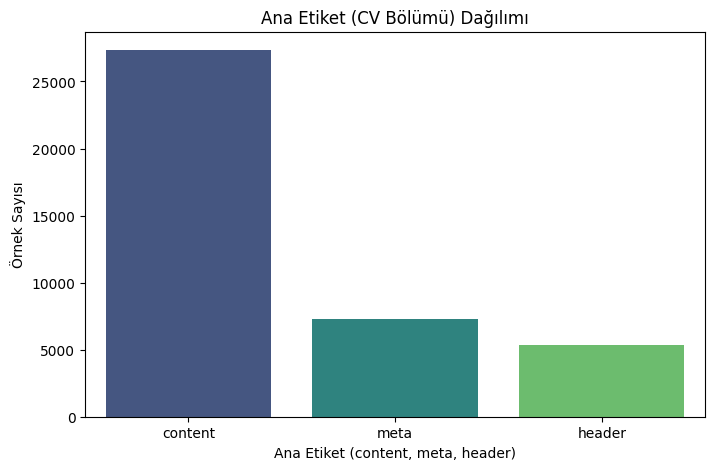

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='main_label', data=df, order=df['main_label'].value_counts().index, palette='viridis')
plt.title('Ana Etiket (CV Bölümü) Dağılımı')
plt.xlabel('Ana Etiket (content, meta, header)')
plt.ylabel('Örnek Sayısı')
plt.show()

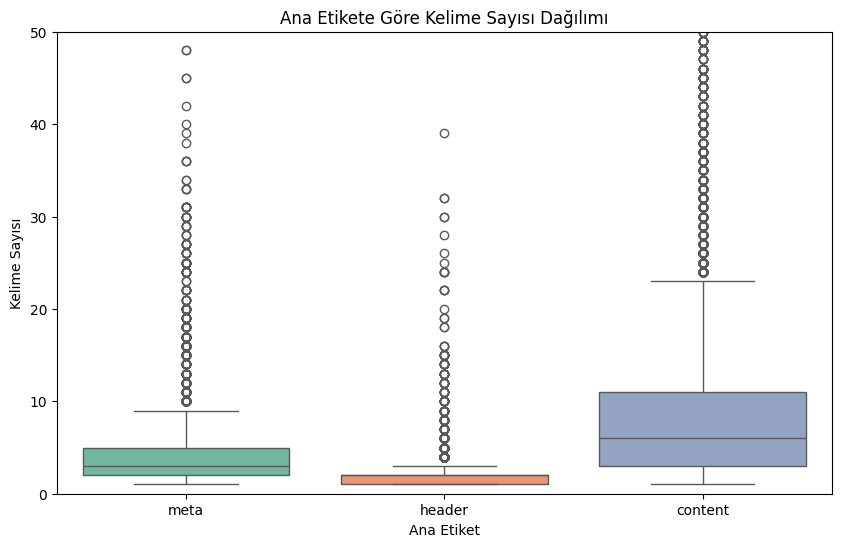

In [17]:
# Yeni bir sütun oluştur: Her satırdaki kelime sayısı
df['word_count'] = df['clean_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
# Box plot ile her etiket grubunun kelime sayısını karşılaştıralım
sns.boxplot(x='main_label', y='word_count', data=df, palette='Set2')
plt.title('Ana Etikete Göre Kelime Sayısı Dağılımı')
plt.xlabel('Ana Etiket')
plt.ylabel('Kelime Sayısı')
plt.ylim(0, 50)
plt.show()

In [18]:
# DOSYAYI SADECE DOSYA ADI İLE KAYDET
# Bu dosya, Colab'ın sol menüsündeki "Dosyalar" sekmesinde görünecektir.
df[['clean_text', 'main_label', 'sub_label']].to_csv(
    'clean_cv_data.csv',
    index=False
)
print("Temizlenmiş veri, Colab'ın geçici ortamına kaydedildi (clean_cv_data.csv).")

Temizlenmiş veri, Colab'ın geçici ortamına kaydedildi (clean_cv_data.csv).


In [19]:
import pandas as pd

df = pd.read_csv("clean_cv_data.csv")
print("Veri boyutu:", df.shape)
df.head()


Veri boyutu: (40001, 3)


,clean_text,main_label,sub_label
0,Jitesh Vishwakarma,meta,others
1,E-mail-Id: - jvishwakarma123@gmail.com,meta,others
2,Contact Number: - 9960902548,meta,others
3,PROFESSIONAL SUMMARY:,header,experience
4,· 4 years of technical experience in implement...,content,experience


In [24]:
print(df.columns.tolist())


['clean_text', 'main_label', 'sub_label']


In [25]:
TEXT_COL = "clean_text"
LABEL_COL = "main_label"


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[TEXT_COL],
    df[LABEL_COL],
    test_size=0.2,
    random_state=42,
    stratify=df[LABEL_COL]
)

print("Eğitim:", len(X_train), " | Test:", len(X_test))


Eğitim: 32000  | Test: 8001


In [28]:
# metin sütunundaki boş değerleri kaldır
df = df.dropna(subset=["clean_text"]).copy()

# güvenlik için, metni stringe çevir (örnek: sayısal veya NaN kalmış olabilir)
df["clean_text"] = df["clean_text"].astype(str)

print("Yeni veri boyutu:", df.shape)
print(df["clean_text"].isna().sum(), "adet boş değer kaldı.")


Yeni veri boyutu: (40000, 3)
0 adet boş değer kaldı.


In [29]:
from sklearn.model_selection import train_test_split

TEXT_COL = "clean_text"
LABEL_COL = "main_label"

X_train, X_test, y_train, y_test = train_test_split(
    df[TEXT_COL],
    df[LABEL_COL],
    test_size=0.2,
    random_state=42,
    stratify=df[LABEL_COL]
)


In [30]:
nb_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=50_000, sublinear_tf=True)),
    ("nb", MultinomialNB(alpha=0.5))
])

nb_pipe.fit(X_train, y_train)
y_pred = nb_pipe.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Naive Bayes TEST Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))


Naive Bayes TEST Accuracy: 0.868
              precision    recall  f1-score   support

     content       0.87      0.97      0.92      5468
      header       0.87      0.66      0.75      1070
        meta       0.83      0.65      0.73      1462

    accuracy                           0.87      8000
   macro avg       0.86      0.76      0.80      8000
weighted avg       0.87      0.87      0.86      8000



In [1]:
!nvidia-smi


Fri Oct 24 17:03:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install tensorflow keras scikit-learn pandas numpy matplotlib


In [4]:
import pandas as pd

df = pd.read_csv("/content/clean_cv_data.csv")
print(df.head())
print(df['main_label'].value_counts())


                                          clean_text main_label   sub_label
0                                 Jitesh Vishwakarma       meta      others
1             E-mail-Id: - jvishwakarma123@gmail.com       meta      others
2                       Contact Number: - 9960902548       meta      others
3                              PROFESSIONAL SUMMARY:     header  experience
4  · 4 years of technical experience in implement...    content  experience
main_label
content    27341
meta        7311
header      5349
Name: count, dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

TEXT_COL  = "clean_text"
LABEL_COL = "main_label"

le = LabelEncoder()
y_all = le.fit_transform(df[LABEL_COL])
num_classes = len(le.classes_)
print("Sınıf sayısı:", num_classes, "\nSınıflar:", list(le.classes_))


Sınıf sayısı: 3 
Sınıflar: ['content', 'header', 'meta']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[TEXT_COL], y_all, test_size=0.20, stratify=y_all, random_state=42
)

# train'den küçük bir validation ayır
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.10, stratify=y_train, random_state=42
)

len(X_train), len(X_val), len(X_test)


(28800, 3200, 8001)

In [9]:
# Tokenization + Padding (düzeltilmiş)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

VOCAB_SIZE = 30000
OOV_TOKEN  = "<unk>"
MAX_LEN    = 200

tok = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tok.fit_on_texts(X_train.astype(str).tolist())

def to_seq(series):
    seqs = tok.texts_to_sequences(series.astype(str).tolist())
    return pad_sequences(seqs, maxlen=MAX_LEN, padding="post", truncating="post")

# --- sadece bu üç satır önemli: to_pad yerine to_seq ve *_seq isimleri ---
Xtr_seq = to_seq(X_train)
Xva_seq = to_seq(X_val)
Xte_seq = to_seq(X_test)

print(Xtr_seq.shape, Xva_seq.shape, Xte_seq.shape)


(28800, 200) (3200, 200) (8001, 200)


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_classes = len(np.unique(y_train))
vocab_size  = min(30000, len(tok.word_index) + 1)  # tok, bir önceki hücreden

def build_text_cnn(max_len=200, vocab_size=vocab_size, num_classes=num_classes,
                   emb_dim=128, conv_filters=128, drop=0.5):
    inp = keras.Input(shape=(max_len,), dtype="int32")
    x = layers.Embedding(vocab_size, emb_dim, input_length=max_len)(inp)

    b3 = layers.Conv1D(conv_filters, 3, activation="relu")(x)
    b4 = layers.Conv1D(conv_filters, 4, activation="relu")(x)
    b5 = layers.Conv1D(conv_filters, 5, activation="relu")(x)

    b3 = layers.GlobalMaxPooling1D()(b3)
    b4 = layers.GlobalMaxPooling1D()(b4)
    b5 = layers.GlobalMaxPooling1D()(b5)

    x = layers.concatenate([b3, b4, b5])
    x = layers.Dropout(drop)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inp, out)

model = build_text_cnn()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 200, 128)  │  2,160,256 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 198, 128)  │     49,280 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 197, 128)  │     65,664 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 196, 128)  │     82,048 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 384)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     49,280 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 3)         │        387 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,406,915 (9.18 MB)

 Trainable params: 2,406,915 (9.18 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.ModelCheckpoint("best_textcnn.keras", monitor="val_accuracy",
                                    save_best_only=True, mode="max"),
    keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3,
                                  restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2,
                                      factor=0.5, verbose=1),
]


In [12]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight = {int(c): float(w) for c, w in zip(classes, cw)}
class_weight  # dengesizlik yoksa bunu kullanmayabilirsin


{0: 0.4876809753619507, 1: 2.4928589976629447, 2: 1.8237082066869301}

In [13]:
EPOCHS = 10
BATCH_SIZE = 64

history = model.fit(
    Xtr_seq, y_train,
    validation_data=(Xva_seq, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    class_weight=class_weight if 'class_weight' in globals() else None
)


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.6929 - loss: 0.7119 - val_accuracy: 0.8800 - val_loss: 0.3769 - learning_rate: 0.0010
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8951 - loss: 0.3186 - val_accuracy: 0.8722 - val_loss: 0.3892 - learning_rate: 0.0010
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9192 - loss: 0.2331 - val_accuracy: 0.8728 - val_loss: 0.3765 - learning_rate: 0.0010
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9305 - loss: 0.1937 - val_accuracy: 0.8566 - val_loss: 0.4236 - learning_rate: 0.0010


In [14]:
val_loss, val_acc = model.evaluate(Xva_seq, y_val, verbose=0)
print(f"Val Acc: {val_acc:.4f}")

test_loss, test_acc = model.evaluate(Xte_seq, y_test, verbose=0)
print(f"Test Acc: {test_acc:.4f}")


Val Acc: 0.8800
Test Acc: 0.8701


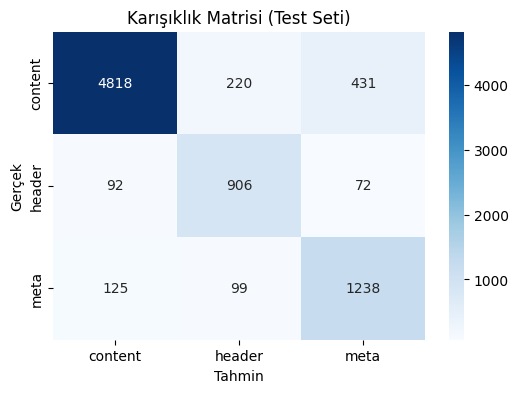

              precision    recall  f1-score   support

     content       0.96      0.88      0.92      5469
      header       0.74      0.85      0.79      1070
        meta       0.71      0.85      0.77      1462

    accuracy                           0.87      8001
   macro avg       0.80      0.86      0.83      8001
weighted avg       0.88      0.87      0.87      8001



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Tahmin al
y_pred = np.argmax(model.predict(Xte_seq, verbose=0), axis=1)

# Matris
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Karışıklık Matrisi (Test Seti)")
plt.show()

# Ayrıntılı skorlar
print(classification_report(y_test, y_pred, target_names=le.classes_))


In [16]:
def predict_text(text):
    seq = pad_sequences(tok.texts_to_sequences([text]), maxlen=200, padding="post", truncating="post")
    probs = model.predict(seq, verbose=0)[0]
    pred = np.argmax(probs)
    return le.inverse_transform([pred])[0], float(probs[pred])

sample = "Contact Number: +90 505 123 4567"
predict_text(sample)


('meta', 0.9598780274391174)

In [17]:
model.save("textcnn_final.keras")
# Drive’a kopyalamak istersen:
# !cp textcnn_final.keras "/content/drive/MyDrive/proje/textcnn_final.keras"


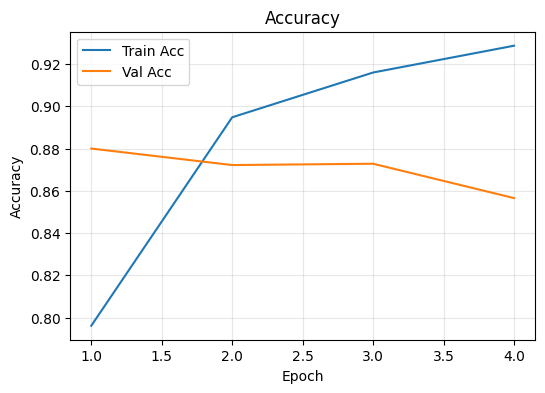

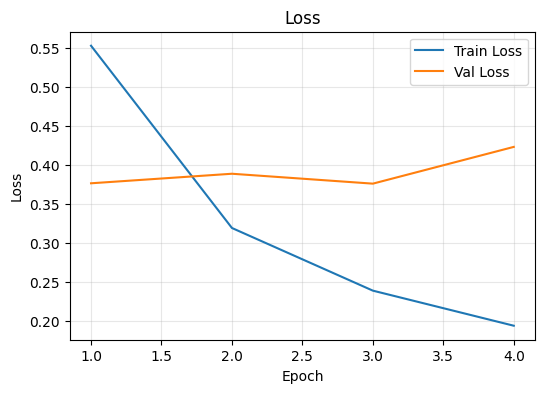

En iyi epoch (val acc’e göre): 1 | Val Acc: 0.8800


In [18]:
import matplotlib.pyplot as plt
import numpy as np

hist = history.history  # model.fit(...)'ten geliyor

epochs = range(1, len(hist["accuracy"]) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, hist["accuracy"], label="Train Acc")
plt.plot(epochs, hist["val_accuracy"], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(epochs, hist["loss"], label="Train Loss")
plt.plot(epochs, hist["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

best_ep = int(np.argmax(hist["val_accuracy"]) + 1)
print(f"En iyi epoch (val acc’e göre): {best_ep} | Val Acc: {hist['val_accuracy'][best_ep-1]:.4f}")


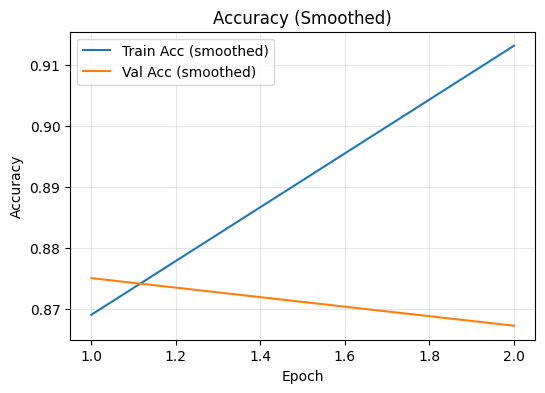

In [19]:
def smooth(xs, w=3):
    xs = np.array(xs, dtype=float)
    if len(xs) < w:
        return xs
    return np.convolve(xs, np.ones(w)/w, mode="valid")

plt.figure(figsize=(6,4))
plt.plot(range(1, len(smooth(hist["accuracy"]))+1), smooth(hist["accuracy"]), label="Train Acc (smoothed)")
plt.plot(range(1, len(smooth(hist["val_accuracy"]))+1), smooth(hist["val_accuracy"]), label="Val Acc (smoothed)")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Accuracy (Smoothed)")
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_classes = len(np.unique(y_train))
vocab_size  = min(30000, len(tok.word_index) + 1)

def build_text_cnn(max_len=200, vocab_size=vocab_size, num_classes=num_classes,
                   emb_dim=96, conv_filters=128, drop=0.6, l2w=1e-4):
    inp = keras.Input(shape=(max_len,), dtype="int32")
    x = layers.Embedding(vocab_size, emb_dim, input_length=max_len)(inp)
    x = layers.SpatialDropout1D(0.2)(x)  # embedding seviyesinde düzenleme

    # 3-4-5 pencereler + L2
    b3 = layers.Conv1D(conv_filters, 3, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(l2w))(x)
    b4 = layers.Conv1D(conv_filters, 4, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(l2w))(x)
    b5 = layers.Conv1D(conv_filters, 5, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(l2w))(x)

    b3 = layers.GlobalMaxPooling1D()(b3)
    b4 = layers.GlobalMaxPooling1D()(b4)
    b5 = layers.GlobalMaxPooling1D()(b5)

    x = layers.concatenate([b3, b4, b5])
    x = layers.Dropout(drop)(x)
    x = layers.Dense(128, activation="relu",
                     kernel_regularizer=keras.regularizers.l2(l2w))(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inp, out)

model = build_text_cnn()
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 200, 96)   │  1,620,192 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d   │ (None, 200, 96)   │          0 │ embedding_2[0][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 198, 128)  │     36,992 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 197, 128)  │     49,280 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 196, 128)  │     61,568 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_6[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_7[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_8[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 384)       │          0 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     49,280 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 3)         │        387 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,817,699 (6.93 MB)

 Trainable params: 1,817,699 (6.93 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
    optimizer=keras.optimizers.Adam(5e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2,
                                  restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=1,
                                      factor=0.5, verbose=1)
]


In [23]:
EPOCHS = 8
BATCH_SIZE = 64

history = model.fit(
    Xtr_seq, y_train,
    validation_data=(Xva_seq, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks
)


Epoch 1/8
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7166 - loss: 0.7238 - val_accuracy: 0.8963 - val_loss: 0.3739 - learning_rate: 5.0000e-04
Epoch 2/8
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8986 - loss: 0.3644 - val_accuracy: 0.9009 - val_loss: 0.3421 - learning_rate: 5.0000e-04
Epoch 3/8
445/450 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9173 - loss: 0.2905
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9173 - loss: 0.2904 - val_accuracy: 0.9022 - val_loss: 0.3434 - learning_rate: 5.0000e-04
Epoch 4/8
445/450 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9311 - loss: 0.2436
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9311 - loss: 0.2436 - val_accuracy: 0.8997 - val_loss: 0.3549 - learning_rate: 2.5000e-04
Epoch 5/8
449/450 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9346 - loss

In [24]:
val_loss, val_acc = model.evaluate(Xva_seq, y_val, verbose=0)
test_loss, test_acc = model.evaluate(Xte_seq, y_test, verbose=0)
print(f"Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")


Val Acc: 0.9022 | Test Acc: 0.8975


In [25]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Test set tahminleri
y_pred = np.argmax(model.predict(Xte_seq, verbose=0), axis=1)

print(classification_report(y_test, y_pred, target_names=list(le.classes_)))

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
cm_df


              precision    recall  f1-score   support

     content       0.93      0.95      0.94      5469
      header       0.81      0.82      0.81      1070
        meta       0.83      0.77      0.80      1462

    accuracy                           0.90      8001
   macro avg       0.86      0.85      0.85      8001
weighted avg       0.90      0.90      0.90      8001



,content,header,meta
content,5171,127,171
header,140,877,53
meta,250,79,1133


In [26]:
# Yanlış sınıflanan ilk 20 örneği göster
wrong_idx = np.where(y_pred != y_test)[0][:20]
pd.DataFrame({
    "text": X_test.iloc[wrong_idx].values,
    "true": le.inverse_transform(y_test[wrong_idx]),
    "pred": le.inverse_transform(y_pred[wrong_idx])
})


,text,true,pred
0,EDUCATIONAL,content,header
1,WIFE: Presently on Pregnancy Leave,meta,content
2,Date: 02-Jan-2018,meta,content
3,HAVERI-581110-KARNATAKA,meta,content
4,situations and get that done successfully with...,meta,content
5,"Pollibetta,Nellikad Estate.",meta,content
6,Date :,header,meta
7,RAMANATHAPURAM,meta,content
8,Sever Skill : Windows server 2008,header,content
9,Name : Lansforsakringar (LFAB),content,meta


In [27]:
import pickle, json

# modeli kaydet
model.save("textcnn_final.keras")

# tokenizer
with open("tokenizer.json", "w") as f:
    f.write(tok.to_json())

# label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# küçük bir tahmin yardımcı dosyası (opsiyonel)
def predict_text(text):
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    seq = pad_sequences(tok.texts_to_sequences([str(text)]), maxlen=200, padding="post", truncating="post")
    probs = model.predict(seq, verbose=0)[0]
    pred = int(np.argmax(probs))
    return le.inverse_transform([pred])[0], float(probs[pred])

# Örnek
print(predict_text("Contact Number: +90 505 123 45 67"))


('meta', 0.5758635401725769)


In [28]:
THRESH = 0.60  # emin değilse sınıflama yapma

def predict_with_threshold(text, thr=THRESH):
    seq = pad_sequences(tok.texts_to_sequences([str(text)]), maxlen=200, padding="post", truncating="post")
    probs = model.predict(seq, verbose=0)[0]
    cls_id = int(np.argmax(probs)); conf = float(probs[cls_id])
    if conf < thr:
        return "unknown", conf
    return le.inverse_transform([cls_id])[0], conf

# örnek
predict_with_threshold("Phone: +90 555 000 00 00")


('content', 0.9677592515945435)

In [29]:
import tensorflow as tf

# Kaydedilmiş modeli yükle (gerekirse)
# model = tf.keras.models.load_model("textcnn_final.keras")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # daha küçük boyut
tflite_model = converter.convert()

with open("textcnn_final.tflite", "wb") as f:
    f.write(tflite_model)
print("TFLite boyutu (KB):", len(tflite_model)/1024)


Saved artifact at '/tmp/tmpedg3g6oy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200), dtype=tf.int32, name='keras_tensor_26')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138801399455312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801399462992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801399456848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801399463568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801399452624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801399463376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801399462224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801399461456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801399462800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801399463760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801399463184: Tens

In [30]:
import numpy as np, tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="textcnn_final.tflite")
interpreter.allocate_tensors()
inp = interpreter.get_input_details()[0]["index"]
out = interpreter.get_output_details()[0]["index"]

def tflite_predict(text):
    seq = pad_sequences(tok.texts_to_sequences([str(text)]), maxlen=200, padding="post", truncating="post").astype(np.int32)
    interpreter.set_tensor(inp, seq)
    interpreter.invoke()
    probs = interpreter.get_tensor(out)[0]
    cls = int(np.argmax(probs))
    return le.inverse_transform([cls])[0], float(probs[cls])

tflite_predict("E-mail: example@site.com")


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


('content', 0.9943813681602478)

In [31]:
import numpy as np
# val set üzerinde logits almak için: son Dense öncesine küçük model kurmaya gerek yok,
# pratik yaklaşım: sıcaklık T ile softmax'ı yeniden hesaplayalım.

T = tf.Variable(1.0, dtype=tf.float32)

def softmax_with_T(logits, T):
    return tf.nn.softmax(logits / T, axis=-1)

# logits almak için küçük bir “logit-model” (son Dense katmanından önceki x'i yakalıyoruz)
logit_layer = model.layers[-1]           # Dense
prelogit_model = tf.keras.Model(model.input, logit_layer.input)

val_logits = prelogit_model.predict(Xva_seq, verbose=0)
val_targets = y_val

opt = tf.keras.optimizers.Adam(1e-2)
for _ in range(200):
    with tf.GradientTape() as tape:
        probs = softmax_with_T(val_logits, T)
        loss = tf.keras.losses.sparse_categorical_crossentropy(val_targets, probs)
        loss = tf.reduce_mean(loss)
    opt.apply_gradients([(tape.gradient(loss, [T])[0], T)])
float(T.numpy())
# kullanırken: probs = softmax_with_T(prelogit_model.predict(seq), T)


0.2898564040660858

In [32]:
def try_config(emb=96, conv=128, drop=0.6, lr=5e-4):
    m = build_text_cnn(emb_dim=emb, conv_filters=conv, drop=drop)
    m.compile(optimizer=keras.optimizers.Adam(lr), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    h = m.fit(Xtr_seq, y_train, validation_data=(Xva_seq, y_val),
              epochs=6, batch_size=64, verbose=0,
              callbacks=[keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)])
    return max(h.history["val_accuracy"])

grid = [
    (96,128,0.6,5e-4),
    (96,160,0.6,5e-4),
    (64,128,0.6,5e-4),
    (96,128,0.5,5e-4),
]
results = {cfg: try_config(*cfg) for cfg in grid}
results


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


{(96, 128, 0.6, 0.0005): 0.9028124809265137,
 (96, 160, 0.6, 0.0005): 0.8993750214576721,
 (64, 128, 0.6, 0.0005): 0.9012500047683716,
 (96, 128, 0.5, 0.0005): 0.903124988079071}

In [33]:
def predict_batch(texts):
    seq = pad_sequences(tok.texts_to_sequences([str(t) for t in texts]), maxlen=200, padding="post", truncating="post")
    probs = model.predict(seq, verbose=0)
    preds = probs.argmax(axis=1)
    return [le.inverse_transform([p])[0] for p in preds], probs.max(axis=1).tolist()


In [36]:
import os, random, numpy as np, tensorflow as tf
def set_seed(s=42):
    os.environ["PYTHONHASHSEED"] = str(s)
    random.seed(s); np.random.seed(s); tf.random.set_seed(s)
set_seed(42)


In [37]:
# 1) TEMEL HAZIRLIK
import os, random, numpy as np, tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

def set_seed(s=42):
    os.environ["PYTHONHASHSEED"]=str(s)
    random.seed(s); np.random.seed(s); tf.random.set_seed(s)
set_seed(42)

num_classes = len(np.unique(y_train))
vocab_size  = min(30000, len(tok.word_index) + 1)


In [38]:
# 2) MODEL MİMARİSİ (emb=96, conv=128, drop=0.5)
def build_text_cnn(max_len=200, vocab_size=vocab_size, num_classes=num_classes,
                   emb_dim=96, conv_filters=128, drop=0.5, l2w=1e-4):
    inp = keras.Input(shape=(max_len,), dtype="int32")
    x = layers.Embedding(vocab_size, emb_dim)(inp)
    x = layers.SpatialDropout1D(0.2)(x)

    b3 = layers.Conv1D(conv_filters, 3, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(l2w))(x)
    b4 = layers.Conv1D(conv_filters, 4, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(l2w))(x)
    b5 = layers.Conv1D(conv_filters, 5, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(l2w))(x)

    b3 = layers.GlobalMaxPooling1D()(b3)
    b4 = layers.GlobalMaxPooling1D()(b4)
    b5 = layers.GlobalMaxPooling1D()(b5)

    x = layers.concatenate([b3, b4, b5])
    x = layers.Dropout(drop)(x)
    x = layers.Dense(128, activation="relu",
                     kernel_regularizer=keras.regularizers.l2(l2w))(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inp, out)

model = build_text_cnn()
model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_8         │ (None, 200, 96)   │  1,620,192 │ input_layer_8[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_6 │ (None, 200, 96)   │          0 │ embedding_8[0][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_24 (Conv1D)  │ (None, 198, 128)  │     36,992 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_25 (Conv1D)  │ (None, 197, 128)  │     49,280 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_26 (Conv1D)  │ (None, 196, 128)  │     61,568 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_24[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_25[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_26[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 384)       │          0 │ concatenate_8[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 128)       │     49,280 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 128)       │          0 │ dense_16[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 3)         │        387 │ dropout_17[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,817,699 (6.93 MB)

 Trainable params: 1,817,699 (6.93 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# 3) COMPILE + TRAIN
model.compile(optimizer=keras.optimizers.Adam(5e-4),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)
]

history = model.fit(
    Xtr_seq, y_train,
    validation_data=(Xva_seq, y_val),
    epochs=12, batch_size=64,
    callbacks=callbacks, verbose=1
)

# hızlı kontrol
val_loss, val_acc = model.evaluate(Xva_seq, y_val, verbose=0)
test_loss, test_acc = model.evaluate(Xte_seq, y_test, verbose=0)
print(f"Val Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")


Epoch 1/12
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7258 - loss: 0.7142 - val_accuracy: 0.8941 - val_loss: 0.3683
Epoch 2/12
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8967 - loss: 0.3749 - val_accuracy: 0.9013 - val_loss: 0.3473
Epoch 3/12
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9146 - loss: 0.2988 - val_accuracy: 0.8963 - val_loss: 0.3563
Epoch 4/12
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9242 - loss: 0.2508 - val_accuracy: 0.8975 - val_loss: 0.3743
Val Acc: 0.9013 | Test Acc: 0.8953


In [40]:
# 4) TEMPERATURE SCALING (kalibrasyon)
T = tf.Variable(1.0, dtype=tf.float32)

# son Dense öncesi aktivasyonu almak için "prelogit" model
logit_layer = model.layers[-1]                 # Dense
prelogit_model = keras.Model(model.input, logit_layer.input)

val_logits = prelogit_model.predict(Xva_seq, verbose=0)
val_targets = y_val

def softmax_with_T(logits, T):
    return tf.nn.softmax(logits / T, axis=-1)

opt = tf.keras.optimizers.Adam(1e-2)
for _ in range(200):
    with tf.GradientTape() as tape:
        probs = softmax_with_T(val_logits, T)
        loss = tf.keras.losses.sparse_categorical_crossentropy(val_targets, probs)
        loss = tf.reduce_mean(loss)
    opt.apply_gradients([(tape.gradient(loss, [T])[0], T)])

print("Öğrenilen T:", float(T.numpy()))


Öğrenilen T: 0.5227634906768799


In [41]:
# 5) PREDICT (kalibre + threshold)
THRESH = 0.68  # istersen 0.65–0.70 aralığında dene

def predict_with_T(text, thr=THRESH):
    seq = pad_sequences(tok.texts_to_sequences([str(text)]), maxlen=200, padding="post", truncating="post")
    logits = prelogit_model.predict(seq, verbose=0)
    probs  = tf.nn.softmax(logits / T).numpy()[0]
    cls_id = int(np.argmax(probs)); conf = float(probs[cls_id])
    if conf < thr:
        return "unknown", conf
    return le.inverse_transform([cls_id])[0], conf

# örnek
print(predict_with_T("Contact Number: +90 505 123 45 67"))


('unknown', 0.024136917665600777)


In [42]:
# 6) EXPORT
import pickle, json, pathlib

model.save("textcnn_final.keras")

with open("tokenizer.json", "w") as f:
    f.write(tok.to_json())

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# T değerini da kaydedelim
with open("temperature.txt", "w") as f:
    f.write(str(float(T.numpy())))

print("Kaydedildi: textcnn_final.keras, tokenizer.json, label_encoder.pkl, temperature.txt")


Kaydedildi: textcnn_final.keras, tokenizer.json, label_encoder.pkl, temperature.txt


In [43]:
# 7) TFLITE CONVERT + TEST
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
with open("textcnn_final.tflite", "wb") as f: f.write(tflite_model)
print("TFLite boyutu (KB):", len(tflite_model)/1024)

# TFLite test (kalibrasyon TFLite'da yok; sadece sınıf tahmini)
interpreter = tf.lite.Interpreter(model_path="textcnn_final.tflite")
interpreter.allocate_tensors()
inp_idx = interpreter.get_input_details()[0]["index"]
out_idx = interpreter.get_output_details()[0]["index"]

def tflite_predict(text):
    seq = pad_sequences(tok.texts_to_sequences([str(text)]), maxlen=200, padding="post", truncating="post").astype(np.int32)
    interpreter.set_tensor(inp_idx, seq)
    interpreter.invoke()
    probs = interpreter.get_tensor(out_idx)[0]
    cls = int(np.argmax(probs))
    return le.inverse_transform([cls])[0], float(probs[cls])

print(tflite_predict("E-mail: example@site.com"))


Saved artifact at '/tmp/tmpv1krnm93'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200), dtype=tf.int32, name='keras_tensor_110')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138801399448592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801626182864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801626178256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801626181136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801626181328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801626179024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801626181712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801626172112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801626180752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801626185552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138801626172496: Ten

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [44]:
# 8) PAKETLEME (opsiyonel)
import zipfile
with zipfile.ZipFile("textcnn_export.zip", "w", zipfile.ZIP_DEFLATED) as z:
    for f in ["textcnn_final.keras", "tokenizer.json", "label_encoder.pkl", "temperature.txt", "textcnn_final.tflite"]:
        z.write(f)
print("Hazır: textcnn_export.zip")


Hazır: textcnn_export.zip
